#📌 Extracción

In [4]:
import requests
import pandas as pd

url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/main/TelecomX_Data.json"

response = requests.get(url)
data = response.json()
df = pd.DataFrame(data)
df.head()

df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

In [6]:
# nombres de columnas
print(df.columns)

# tipos de datos de cada columna
print(df.dtypes)


df.info()

Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')
customerID    object
Churn         object
customer      object
phone         object
internet      object
account       object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [ ]:
# claves de los diccionarios en cada columna
print(df['customer'][0].keys())
print(df['phone'][0].keys())
print(df['internet'][0].keys())
print(df['account'][0].keys())

# Vista en cada columna
print(df['customer'][0])
print(df['phone'][0])
print(df['internet'][0])
print(df['account'][0])

dict_keys(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure'])
dict_keys(['PhoneService', 'MultipleLines'])
dict_keys(['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'])
dict_keys(['Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges'])
{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'Yes', 'Dependents': 'Yes', 'tenure': 9}
{'PhoneService': 'Yes', 'MultipleLines': 'No'}
{'InternetService': 'DSL', 'OnlineSecurity': 'No', 'OnlineBackup': 'Yes', 'DeviceProtection': 'No', 'TechSupport': 'Yes', 'StreamingTV': 'Yes', 'StreamingMovies': 'No'}
{'Contract': 'One year', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Mailed check', 'Charges': {'Monthly': 65.6, 'Total': '593.3'}}


In [10]:
# Verificar valores nulos por columna
print(df.isnull().sum())

# Verificar duplicados solo en columnas simples
print(df.duplicated(subset=['customerID', 'Churn']).sum())

# Verificar ejemplos de valores nulos
print(df[df.isnull().any(axis=1)].head())

customerID    0
Churn         0
customer      0
phone         0
internet      0
account       0
dtype: int64
0
Empty DataFrame
Columns: [customerID, Churn, customer, phone, internet, account]
Index: []


In [ ]:

df = df.drop_duplicates(subset=['customerID', 'Churn'])

df['Churn'] = df['Churn'].str.lower()

df['Churn'] = df['Churn'].str.strip()

df = df[df['Churn'].isin(['yes', 'no'])]


In [ ]:
# Extraer el campo 'Monthly' de 'Charges' dentro de 'account'
df['MonthlyCharges'] = df['account'].apply(lambda x: x['Charges']['Monthly'] if 'Charges' in x and 'Monthly' in x['Charges'] else None)

# Crear la columna Cuentas_Diarias
df['Cuentas_Diarias'] = df['MonthlyCharges'] / 30

# Mostrar las primeras filas 
print(df[['MonthlyCharges', 'Cuentas_Diarias']].head())

   MonthlyCharges  Cuentas_Diarias
0            65.6         2.186667
1            59.9         1.996667
2            73.9         2.463333
3            98.0         3.266667
4            83.9         2.796667


In [16]:

df['Churn_bin'] = df['Churn'].map({'yes': 1, 'no': 0})

print(df[['Churn', 'Churn_bin']].head())

  Churn  Churn_bin
0    no          0
1    no          0
2   yes          1
3   yes          1
4   yes          1


#📊 Carga y análisis

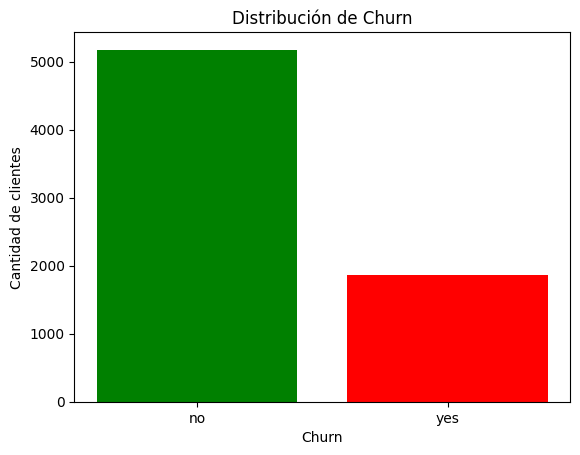

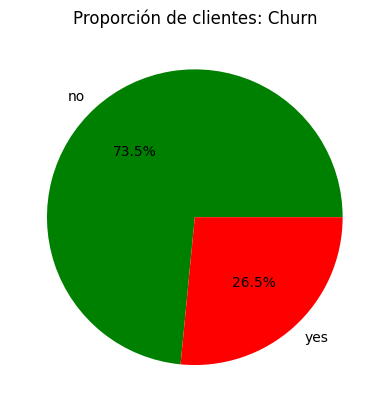

In [17]:
import matplotlib.pyplot as plt

# Conteo de valores
churn_counts = df['Churn'].value_counts()

# Gráfico de barras
plt.bar(churn_counts.index, churn_counts.values, color=['green', 'red'])
plt.title('Distribución de Churn')
plt.xlabel('Churn')
plt.ylabel('Cantidad de clientes')
plt.show()

# Gráfico de pastel (opcional)
plt.pie(churn_counts.values, labels=churn_counts.index, autopct='%1.1f%%', colors=['green', 'red'])
plt.title('Proporción de clientes: Churn')
plt.show()

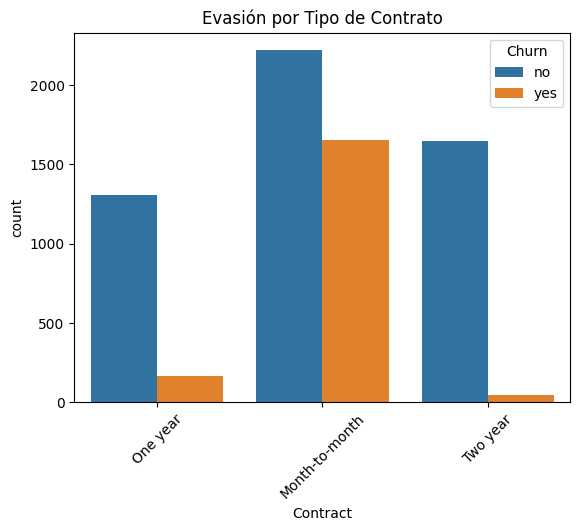

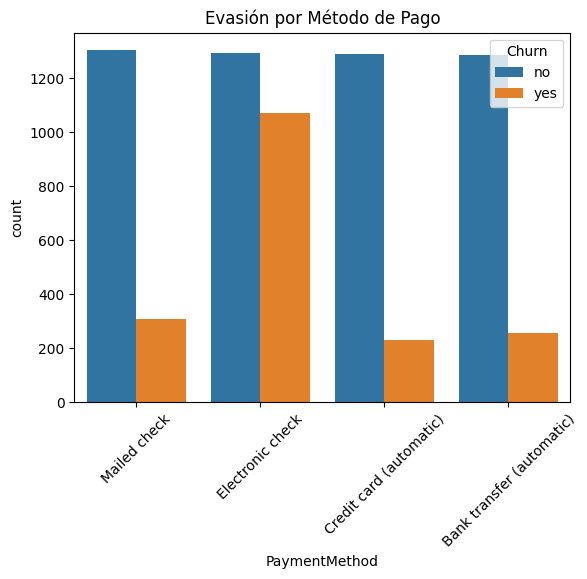

In [27]:
# variables categóricas 
df['Gender'] = df['customer'].apply(lambda x: x.get('Gender', None))
df['Contract'] = df['account'].apply(lambda x: x.get('Contract', None))
df['PaymentMethod'] = df['account'].apply(lambda x: x.get('PaymentMethod', None))

# Gráfico de evasión por tipo de contrato
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Evasión por Tipo de Contrato')
plt.xticks(rotation=45)
plt.show()

# Gráfico de evasión por método de pago
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.title('Evasión por Método de Pago')
plt.xticks(rotation=45)
plt.show()

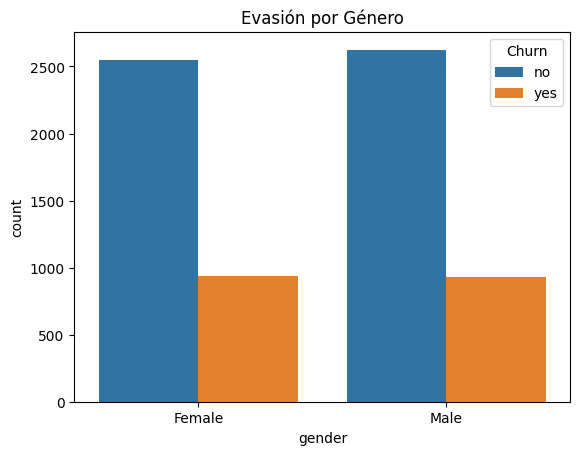

In [ ]:

df['gender'] = df['customer'].apply(lambda x: x.get('gender', None))

# Gráfico
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='gender', hue='Churn', data=df)
plt.title('Evasión por Género')
plt.show()

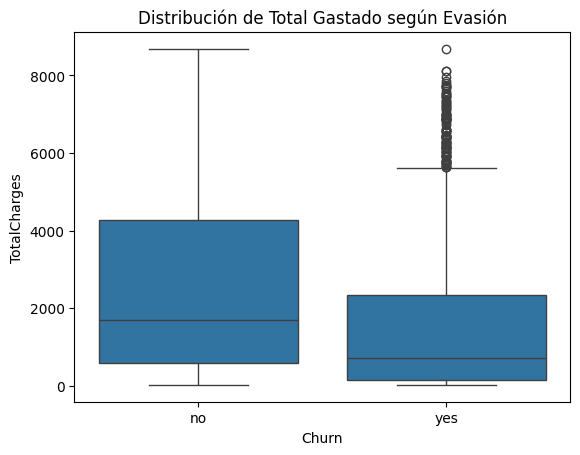

In [35]:
# Extraer variables numéricas
df['TotalCharges'] = pd.to_numeric(df['account'].apply(lambda x: x['Charges']['Total'] if 'Charges' in x and 'Total' in x['Charges'] else None), errors='coerce')
df['Tenure'] = pd.to_numeric(df['account'].apply(lambda x: x.get('Tenure', None)), errors='coerce')

import seaborn as sns
import matplotlib.pyplot as plt

# filas con valores válidos
df_totalcharges = df[df['TotalCharges'].notnull()]
df_tenure = df[df['Tenure'].notnull()]

# Gráfico de TotalCharges según evasión
sns.boxplot(x='Churn', y='TotalCharges', data=df_totalcharges)
plt.title('Distribución de Total Gastado según Evasión')
plt.show()



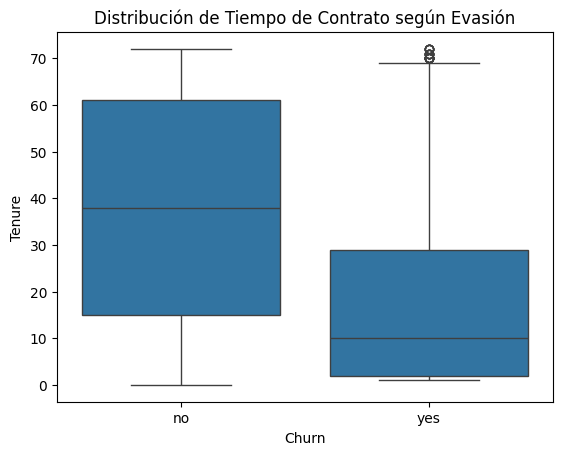

In [34]:
# Extraer correctamente la variable Tenure
df['Tenure'] = pd.to_numeric(df['customer'].apply(lambda x: x.get('tenure', None)), errors='coerce')

# Filtrar filas con Tenure válido y Churn válido
df_tenure = df[(df['Tenure'].notnull()) & (df['Churn'].notnull())]

# Gráfico de distribución de Tenure según evasión
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Churn', y='Tenure', data=df_tenure)
plt.title('Distribución de Tiempo de Contrato según Evasión')
plt.show()